In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
data_file = pd.read_csv('globalterrorismdb_0718dist.csv', encoding ='latin =1')
data_file.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [4]:
data_file.describe()

,eventid,iyear,imonth,iday,extended,country,region,latitude,longitude,specificity,...,ransomamt,ransomamtus,ransompaid,ransompaidus,hostkidoutcome,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
count,1.816910e+05,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,181685.000000,...,1.350000e+03,5.630000e+02,7.740000e+02,552.000000,10991.000000,10400.000000,181691.000000,181691.000000,181691.000000,181691.000000
mean,2.002705e+11,2002.638997,6.467277,15.505644,0.045346,131.968501,7.160938,23.498343,-4.586957e+02,1.451452,...,3.172530e+06,5.784865e+05,7.179437e+05,240.378623,4.629242,-29.018269,-4.543731,-4.464398,0.090010,-3.945952
std,1.325957e+09,13.259430,3.388303,8.814045,0.208063,112.414535,2.933408,18.569242,2.047790e+05,0.995430,...,3.021157e+07,7.077924e+06,1.014392e+07,2940.967293,2.035360,65.720119,4.543547,4.637152,0.568457,4.691325
min,1.970000e+11,1970.000000,0.000000,0.000000,0.000000,4.000000,1.000000,-53.154613,-8.618590e+07,1.000000,...,-9.900000e+01,-9.900000e+01,-9.900000e+01,-99.000000,1.000000,-99.000000,-9.000000,-9.000000,-9.000000,-9.000000
25%,1.991021e+11,1991.000000,4.000000,8.000000,0.000000,78.000000,5.000000,11.510046,4.545640e+00,1.000000,...,0.000000e+00,0.000000e+00,-9.900000e+01,0.000000,2.000000,-99.000000,-9.000000,-9.000000,0.000000,-9.000000
50%,2.009022e+11,2009.000000,6.000000,15.000000,0.000000,98.000000,6.000000,31.467463,4.324651e+01,1.000000,...,1.500000e+04,0.000000e+00,0.000000e+00,0.000000,4.000000,0.000000,-9.000000,-9.000000,0.000000,0.000000
75%,2.014081e+11,2014.000000,9.000000,23.000000,0.000000,160.000000,10.000000,34.685087,6.871033e+01,1.000000,...,4.000000e+05,0.000000e+00,1.273412e+03,0.000000,7.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,2.017123e+11,2017.000000,12.000000,31.000000,1.000000,1004.000000,12.000000,74.633553,1.793667e+02,5.000000,...,1.000000e+09,1.320000e+08,2.750000e+08,48000.000000,7.000000,2769.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
df=data_file[['iyear','imonth','iday','country_txt','provstate','region_txt','attacktype1_txt','target1','nkill','nwound','summary','gname','targtype1_txt','weaptype1_txt','motive']]

In [6]:
df['killed']=df['nkill'].fillna(0)
df['wounded']=df['nwound'].fillna(0)
df['casualities']=df['nkill']+df['nwound']
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 18 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   iyear            181691 non-null  int64  
 1   imonth           181691 non-null  int64  
 2   iday             181691 non-null  int64  
 3   country_txt      181691 non-null  object 
 4   provstate        181270 non-null  object 
 5   region_txt       181691 non-null  object 
 6   attacktype1_txt  181691 non-null  object 
 7   target1          181055 non-null  object 
 8   nkill            171378 non-null  float64
 9   nwound           165380 non-null  float64
 10  summary          115562 non-null  object 
 11  gname            181691 non-null  object 
 12  targtype1_txt    181691 non-null  object 
 13  weaptype1_txt    181691 non-null  object 
 14  motive           50561 non-null   object 
 15  killed           181691 non-null  float64
 16  wounded          181691 non-null  floa

In [7]:
# Total Casualties
df['casualities'].count()

164817

Exploratory Data Analysis 

Top Countries facing Casualities

In [8]:
df[['casualities']].groupby(df['country_txt']).sum().sort_values(by=['casualities'], ascending=False)

,casualities
country_txt,
Iraq,202982.0
Afghanistan,80213.0
Pakistan,64427.0
India,47108.0
Sri Lanka,29792.0
...,...
Andorra,0.0
Iceland,0.0
New Hebrides,0.0


According to the data provided above,Iraq is having the highest number of casualities followed by Afghanistan and then Pakistan

Top States In Iraq which are being plagued by terrorism

In [9]:
df[(df['country_txt']=='Iraq')]['provstate'].value_counts().head()

Baghdad     7644
Saladin     3411
Al Anbar    3299
Nineveh     3241
Diyala      3041
Name: provstate, dtype: int64

From the data above we can conclude that baghdad is the most affected state in the country of Iraq

Identifying the pattern of terror attacks Over The World

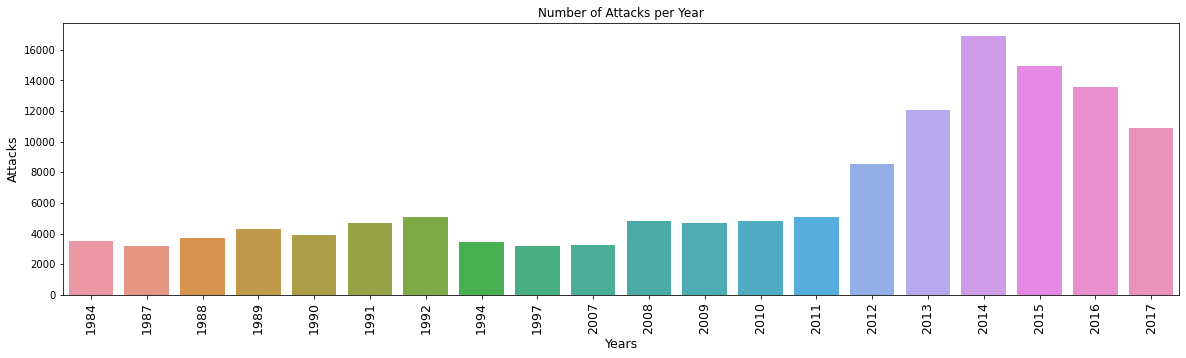

In [10]:
plt.figure(figsize=(20,5))
sns.barplot(x=df['iyear'].value_counts()[:20].index,y=df['iyear'].value_counts().values[:20])
plt.title('Number of Attacks per Year')
plt.xticks(rotation=90,fontsize=12.5)
plt.xlabel('Years', fontsize=12.5)
plt.ylabel('Attacks', fontsize=12.5)
plt.show()

Next we identify the group which has hosted numerous terrorist attacks

In [11]:
df['gname'].value_counts().head()

Unknown                                             82782
Taliban                                              7478
Islamic State of Iraq and the Levant (ISIL)          5613
Shining Path (SL)                                    4555
Farabundo Marti National Liberation Front (FMLN)     3351
Name: gname, dtype: int64

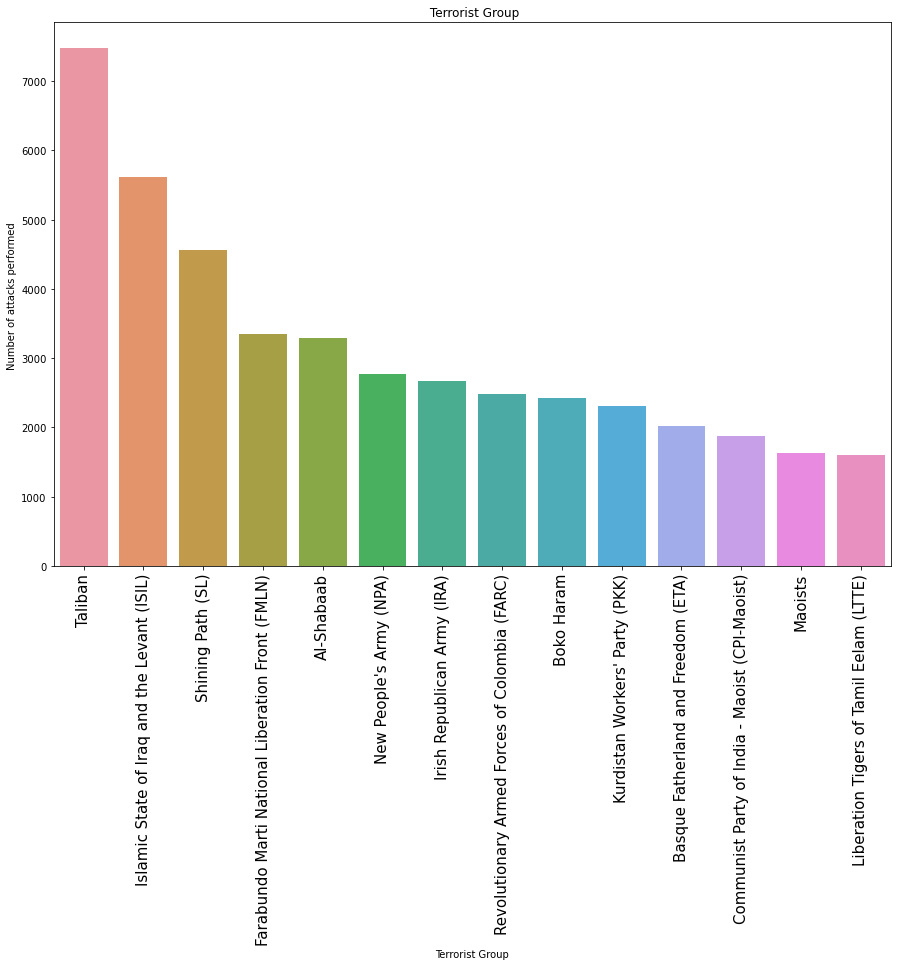

In [12]:
plt.figure(figsize=(15,10))
sns.barplot(x=df['gname'].value_counts()[1:15].index,y=df['gname'].value_counts().values[1:15])
plt.title(' Terrorist Group')
plt.xticks(rotation=90,fontsize=15)
plt.xlabel("Terrorist Group")
plt.ylabel("Number of attacks performed ")
plt.show()

Next we Identify the Type of weapons used in executing the terrorist attacks

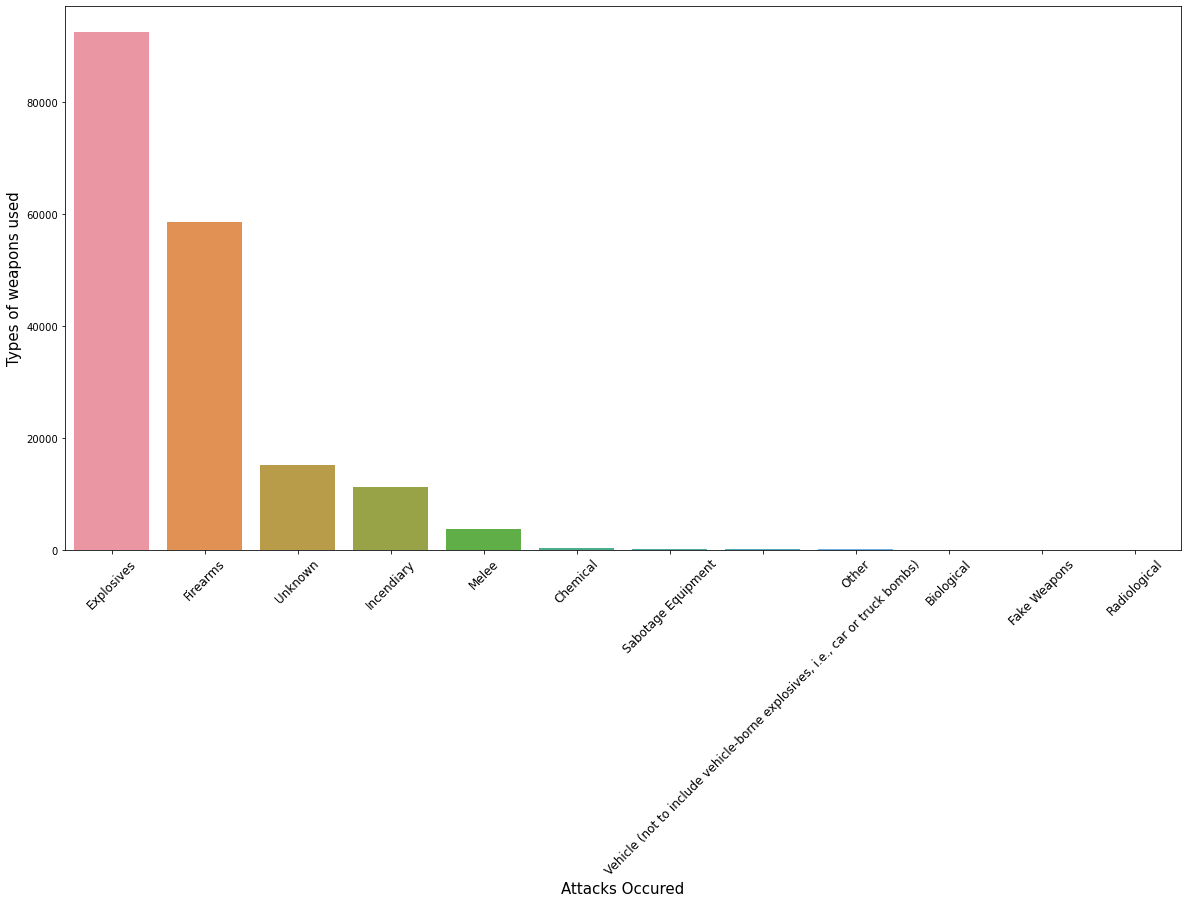

In [13]:
plt.subplots(figsize=(20,10))
sns.countplot(df["weaptype1_txt"],order=df['weaptype1_txt'].value_counts().index)
plt.xticks(rotation=45, fontsize=12)
plt.xlabel("Attacks Occured", fontsize=15)
plt.ylabel("Types of weapons used", fontsize=15)
plt.show()